In [ ]:
%pip install ipympl
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
import math

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [369]:
def F(x: float, Y: tuple[float, float]) -> tuple[float, float]:
    y, z = Y
    return (z, y + 0.7 * x * (x-1)**2 + 2.8)


def Init(h:float, Y:tuple[float, float]):
    y0, z0 = Y
    y1, z1 = F(0, Y)
    y2, z2 = y0 + 0.5*h*y1 , z0 + 0.5*h*z1
    y3, z3 = F(h/2, (y2, z2))
    y4, z4 = y0 + h*y3, z0 + h*z3
    return (y4, z4)

In [370]:

def Y(m: float, h: float, graphs = None) -> float:
    a = 0
    b = 5
    Y_0 = (m, -4.9)
    F_0 = F(a, Y_0)
    
    x = a + h
    i = 1
    Y_1 = Init(h, Y_0)
    F_1 = F(x, Y_1)
    graph = [(0, Y_0[0]), (x, Y_1[0])]

    k1 = h * 3 / 2
    k0 = - h / 2
    while x < b:
        Y_0, Y_1 = Y_1, (Y_1[0] + k1 * F_1[0] + k0 * F_0[0], Y_1[1] + k1 * F_1[1] + k0 * F_0[1])
        i += 1
        x = a + i * h
        F_0, F_1 = F_1, F(x, Y_1)
        graph.append((x, Y_1[0]))
    if graphs is not None: graphs.append(graph)
    return Y_1


yx_h = []
yx_2h = []

gm_h = []
gm_2h = []
offset = math.exp(5) + math.exp(-5) - 43.4
def g1(m: float) -> float:
    g = Y(m,h1,yx_h)[1]-offset
    gm_h.append((m, g))
    return g

def g2(m: float) -> float:
    g = Y(m,h2,yx_2h)[1]-offset
    gm_2h.append((m, g))
    return g

        

a1 = a2 = -10
b1 = b2 = 10
h1 = 0.1
k = 2
h2 = k*h1

g1a = g1(a1)
g1b = g1(b1)
g2a = g2(a2)
g2b = g2(b2)
E1 = 0.1
E2 = 0.1
assert g1a*g1b < 0
assert g2a*g2b < 0

i1 = 0
i2 = 0
while b2 - a2 > 2*E2:
    i1 += 1
    i2 += 1

    der1 = (g1b - g1a) / (b1 - a1)
    der2 = (g2b - g2a) / (b2 - a2)

    c1 = (a1 + b1)/2
    c2 = (a2 + b2)/2
    g1c = g1(c1)
    g2c = g2(c2)

    d1 = (g1c - g2c) / (k**2 - 1)
    d2 = d1 * (k**2)

    E1 = abs(d1) / der1
    E2 = abs(d2) / der2

    print(f"m = {c1}, derivetivs {der1:.1f}, {der2:.1f} & errors {d1:.3f}, {d2:.3f}, epsilons {E1:.5f}, {E2:.5f}")

    if g1c * g2c > 0:
        if g1a * g1c < 0:
            b1 = b2 = c1
            g1b = g1c
            g2b = g2c
        else:
            a1 = a2 = c2
            g1a = g1c
            g2a = g2c
        
    else:
        print("diverged")
        if g1a * g1c < 0:
            b1 = c2
            g1b = g1c
        else:
            a1 = c1
            g1a = g1c

        if g2a * g2c < 0:
            b2 = c2
            g2b = g2c
        else:
            a2 = c2
            g2a = g2c
        break







while b1 - a1 > 2*E1:
    i1 += 1
    c1 = (a1 + b1) / 2
    g1c = g1(c1)
    #print(f"m={c}, g(m,h)={gc1h}")
    if g1a * g1c < 0:
        b1 = c1
        g1b = g1c
    else:
        a1 = c1
        g1a = g1c
    print(f"m = {c1}")
print(f"h = {h1} at {i1} iterations, m = {c1}, g(m) = {g1c}")

while b2 - a2 > 2*E2:
    i2 += 1
    c2 = (a2 + b2) / 2
    g2c = g2(c2)
    #print(f"m={c}, g(m,h)={gc1h}")
    if g2a * g2c < 0:
        b2 = c2
        g2b = g2c
    else:
        a2 = c2
        g2a = g2c
print(f"h = {h2} at {i2} iterations, m = {c2}, g(m) = {g2c}")


m = 0.0, derivetivs 72.8, 69.2 & errors -0.954, -3.814, epsilons 0.01310, 0.05513
m = 5.0, derivetivs 72.8, 69.2 & errors 5.068, 20.270, epsilons 0.06962, 0.29302
m = 2.5, derivetivs 72.8, 69.2 & errors 2.057, 8.228, epsilons 0.02826, 0.11894
m = 1.25, derivetivs 72.8, 69.2 & errors 0.552, 2.207, epsilons 0.00758, 0.03190
m = 1.875, derivetivs 72.8, 69.2 & errors 1.304, 5.218, epsilons 0.01792, 0.07542
m = 2.1875, derivetivs 72.8, 69.2 & errors 1.681, 6.723, epsilons 0.02309, 0.09718
m = 2.03125, derivetivs 72.8, 69.2 & errors 1.493, 5.970, epsilons 0.02051, 0.08630
diverged
m = 1.953125
m = 1.9921875
h = 0.1 at 9 iterations, m = 1.9921875, g(m) = -2.2543922184446075
h = 0.2 at 7 iterations, m = 2.03125, g(m) = -3.888738724631949


In [371]:
def f(x): return math.exp(x) + math.exp(-x) - 0.7 * x * (x **2 - 2*x + 7)
analitic_x = [i * 0.01 for i in range(501)]
analitic_y = [f(x) for x in analitic_x]


In [ ]:


h1 = 0.1
h2= 2*h1
a = -4.9
b = math.exp(5) - math.exp(-5) - 43.4
def Q(x): return 0.7 * x * (x-1)**2 + 2.8

l1=2+h1**2
K1 = [1]
D1 = [-h1*a]
for i in range(1, round(5/h1)):
    K1.append(1 / (l1 - K1[-1]))
    D1.append((-h1**2 * Q(i * h1) + D1[-1]) * K1[-1])
K1.append(1 / (1 - K1[-1]))
D1.append((h1 * b + D1[-1]) * K1[-1])

Y1 = [None] * (round(5/h1)+1)
y1 = D1[-1]
Y1[-1] = (5,y1)
for i in range(round(5/h1)-1, -1, -1):
    y1 = y1 * K1[i] + D1[i]
    Y1[i] = (i * h1, y1)


l2=2+h2**2
K2 = [1]
D2 = [-h2*a]
for i in range(1, round(5/h2)):
    K2.append(1 / (l2 - K2[-1]))
    D2.append((-h2**2 * Q(i * h2) + D2[-1]) * K2[-1])
K2.append(1 / (1 - K2[-1]))
D2.append((h2 * b + D2[-1]) * K2[-1])

Y2 = [None] * (round(5/h2)+1)
y2 = D2[-1]
Y2[-1] = (5,y2)
for i in range(round(5/h2)-1, -1, -1):
    y2 = y2 * K2[i] + D2[i]
    Y2[i] = (i * h2, y2)


51 26
51 26


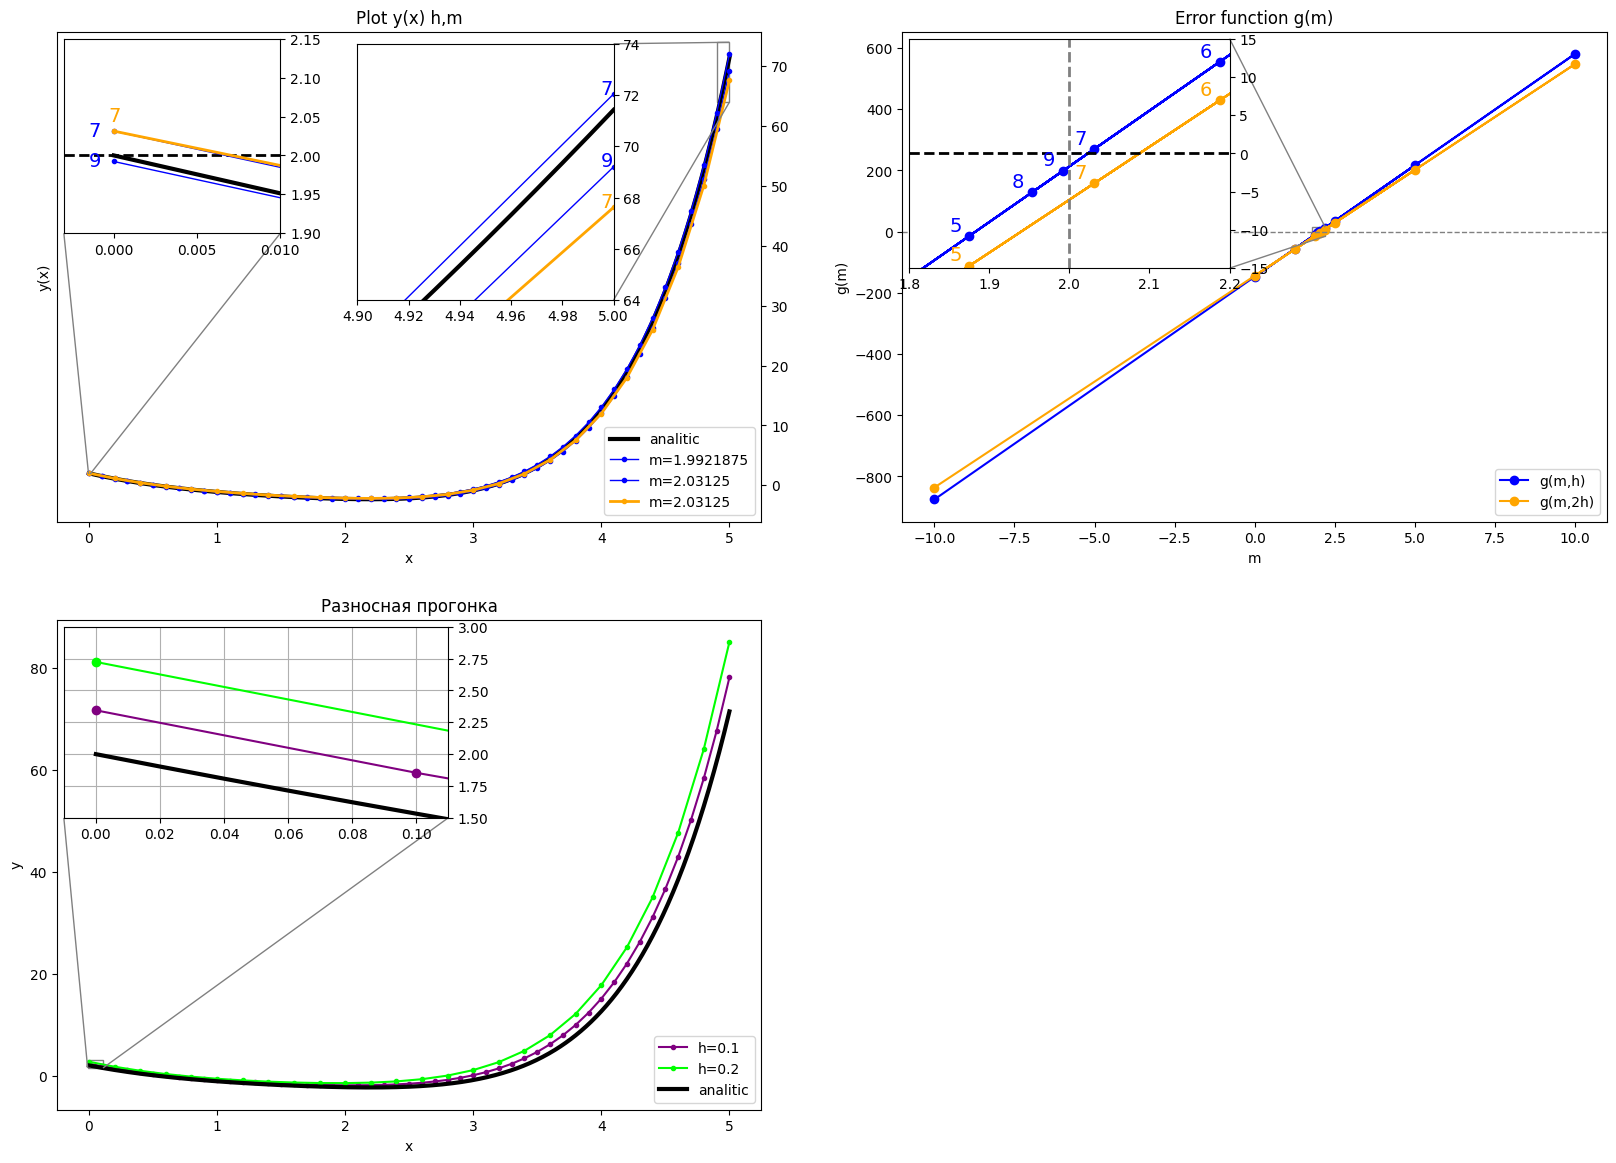

In [400]:
from matplotlib.axes import Axes


fig = plt.figure(1 ,figsize=(20, 14))



# Plot all g(m,h) and g(m,2h)
gm_axis = fig.add_subplot(2,2,2, title = 'Error function g(m)', xlabel = 'm', ylabel = 'g(m)')
gm_axis.plot(*zip(*gm_h), label='g(m,h)', color='blue', marker='o')
gm_axis.plot(*zip(*gm_2h), label='g(m,2h)', color='orange', marker='o')
gm_axis.axhline(0, color='gray', linestyle='--', linewidth=1)
gm_axis.legend(loc = "lower right")

gm_zoom:Axes = zoomed_inset_axes(gm_axis, 25, loc='upper left')
gm_zoom.plot(*zip(*gm_h), label='g(m,h)', color='blue', marker='o')
gm_zoom.plot(*zip(*gm_2h), label='g(m,2h)', color='orange', marker='o')
gm_zoom.axhline(0, color='black', linestyle='--', linewidth=2)
gm_zoom.axvline(2, color='gray', linestyle='--', linewidth=2)
gm_zoom.set_xlim(1.8, 2.2)
gm_zoom.set_ylim(-15, 15)
gm_zoom.yaxis.tick_right()
mark_inset(gm_axis, gm_zoom, loc1=4, loc2=1, fc="none", ec="0.5")



# Plot all y(x) curves for each m in yxm_h
yx_axis = fig.add_subplot(2,2,1, title = "Plot y(x) h,m", xlabel = "x", ylabel = "y(x)")
yx_axis.yaxis.tick_right()

yx_zoom:Axes = zoomed_inset_axes(yx_axis, 130, loc='upper left')
yx_zoom.axhline(2, color='black', linestyle='--', linewidth=2)
yx_zoom.set_xlim(-0.003, 0.01)
yx_zoom.set_ylim(1.9, 2.15)
yx_zoom.yaxis.tick_right()
mark_inset(yx_axis, yx_zoom, loc1=3, loc2=4, fc="none", ec="0.5")

yx_end:Axes = zoomed_inset_axes(yx_axis, 20, bbox_to_anchor=(0.8, 1.95), bbox_transform=yx_axis.transAxes)
yx_end.set_xlim(4.9, 5)
yx_end.set_ylim(64,74)
yx_end.set_aspect(0.01)
yx_end.yaxis.tick_right()
mark_inset(yx_axis, yx_end, loc1=1, loc2=4, fc="none", ec="0.5")

def PLT1(i):
    x, y = zip(*yx_h[i])
    m = gm_h[i][0]
    yx_axis.plot(x, y, label=f"m={m}", color='blue', marker='.', linewidth=1)
    yx_zoom.plot(x, y, label=f"m={m}", color='blue', marker='.', linewidth=1)
    yx_end.plot(x, y, label=f"m={m}", color='blue', marker='.', linewidth=1)
    yx_zoom.annotate(str(i-1), xy=yx_h[i][0], xytext=(-25, -5), textcoords='offset pixels', fontsize=14, color='blue')
    yx_end.annotate(f"{i-1}", xy=yx_h[i][-1], xytext=(-13, 0), textcoords='offset pixels', fontsize=14, color='blue')
    
def PLT2(i):
    x, y = zip(*yx_2h[i])
    m = gm_2h[i][0]
    yx_axis.plot(x, y, label=f"m={m}", color='orange', marker='.', linewidth=2)
    yx_zoom.plot(x, y, label=f"m={m}", color='orange', marker='.', linewidth=2)
    yx_end.plot(x, y, label=f"m={m}", color='orange', marker='.', linewidth=2)
    yx_zoom.annotate(str(i-1), xy=yx_2h[i][0], xytext=(-5, 10), textcoords='offset pixels', fontsize=14, color='orange')
    yx_end.annotate(f"{i-1}", xy=yx_2h[i][-1], xytext=(-13, 0), textcoords='offset pixels', fontsize=14, color='orange')
    

def ANN(i):
    if len(gm_2h) > i:
        gm_zoom.annotate(f"{i-1}", xy=gm_2h[i], xytext=(-20, 5), textcoords='offset pixels', fontsize=14, color='orange')
    gm_zoom.annotate(f"{i-1}", xy=gm_h[i], xytext=(-20, 5), textcoords='offset pixels', fontsize=14, color='blue')

yx_axis.plot(analitic_x, analitic_y, label="analitic", color='black', linewidth=3)
yx_zoom.plot(analitic_x, analitic_y, label="analitic", color='black', linewidth=3)
yx_end.plot(analitic_x, analitic_y, label="analitic", color='black', linewidth=3)


YX_axes = fig.add_subplot(2,2,3, title = "Разносная прогонка", xlabel = "x", ylabel = "y")
YX_axes.plot(*zip(*Y1), label = "h=0.1", color = "purple", marker = '.')
YX_axes.plot(*zip(*Y2), label = "h=0.2", color = "lime", marker = '.')
YX_axes.plot(analitic_x, analitic_y, label="analitic", color='black', linewidth=3)
YX_zoom:Axes = zoomed_inset_axes(YX_axes, 25, loc = "upper left")
YX_zoom.set_xlim(-0.01, 0.11)
YX_zoom.set_ylim(1.5, 3)
YX_zoom.yaxis.tick_right()
mark_inset(YX_axes, YX_zoom, loc1=3, loc2=4, fc="none", ec="0.5")
YX_zoom.plot(analitic_x, analitic_y, label="analitic", color='black', linewidth=3)
YX_zoom.plot(*zip(*Y1), label = "h=0.1", color = "purple", marker = 'o')
YX_zoom.plot(*zip(*Y2), label = "h=0.2", color = "lime", marker = 'o')

#YX_axes.axhline(0, color='gray', linestyle='--', linewidth=1)
YX_axes.legend(loc = "lower right")

# i = len(yx_2h) - 1
# PLT1(i)
# PLT2(i-1)
# PLT2(i)
# for i in range(len(yx_2h), len(yx_h)): PLT1(i)
PLT1(len(yx_h) - 1)
PLT1(len(yx_2h) - 1)
PLT2(len(yx_2h) - 1)
for i in range(len(yx_h)): ANN(i)

yx_axis.legend(loc = "lower right")



plt.grid()
plt.show()
